In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [9]:
# Make sure the number of rows divides evenly into four samples.
rows = heartdisease.shape[0] - heartdisease.shape[0] % 2
df = heartdisease.iloc[:rows, :]

# Break into a set of features and a variable for the known outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace some random string values.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

# Normalize
X_std = StandardScaler().fit_transform(X)

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)


1. Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result? 

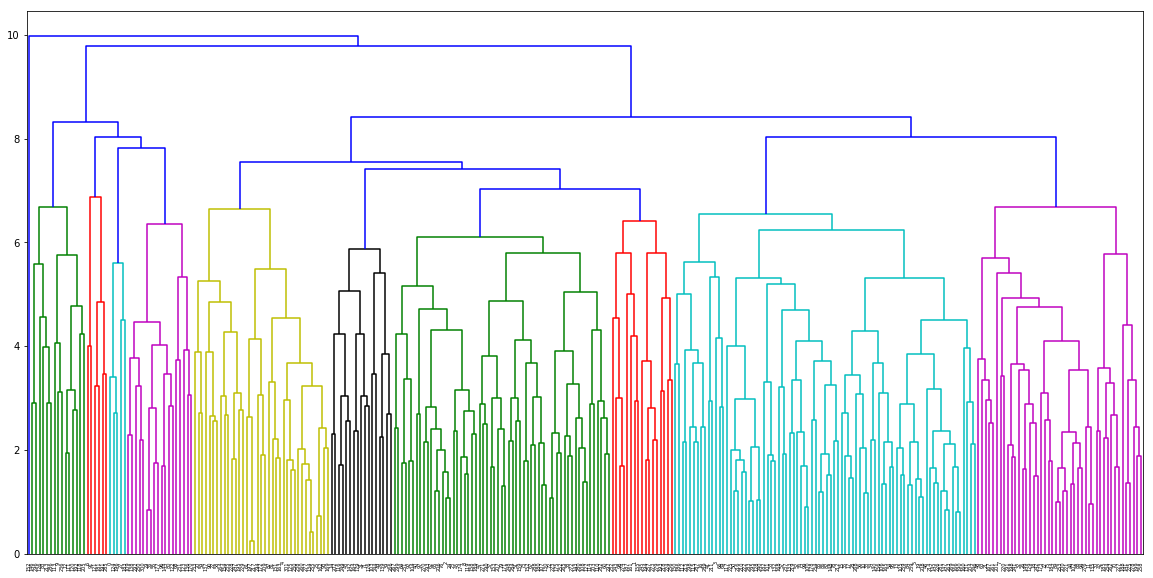

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Complete linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

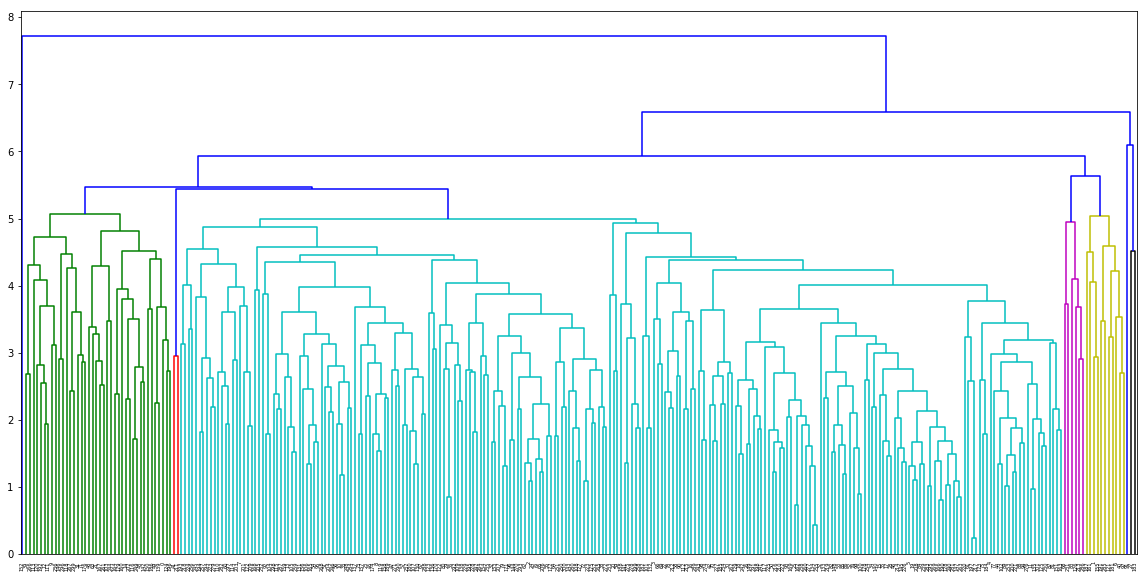

In [11]:
# Average linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

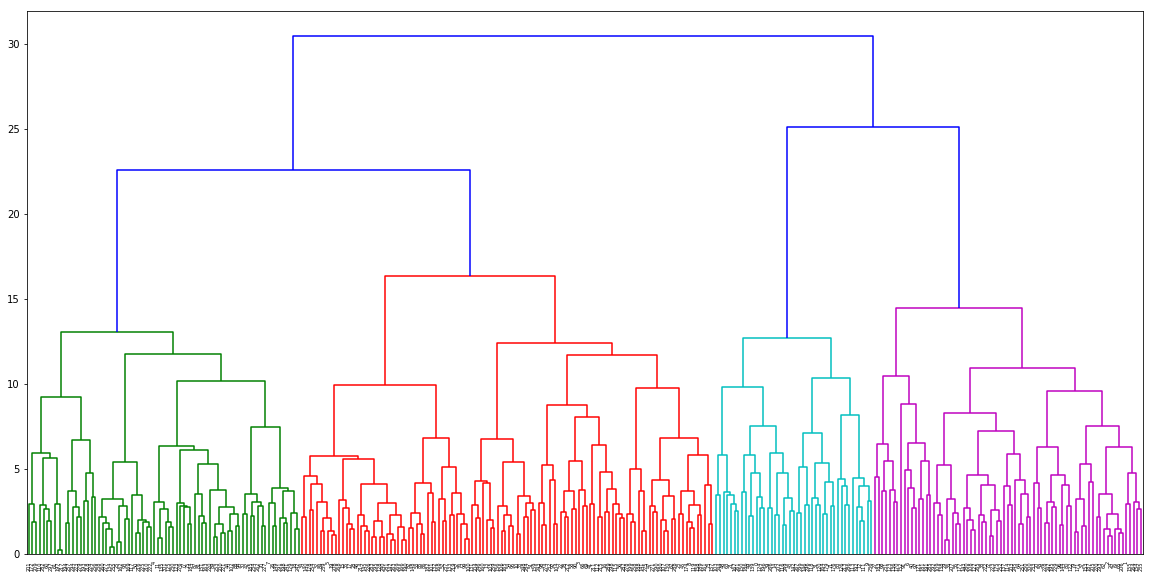

In [12]:
# Ward linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

Looking at the dendrograms from the three different linkage methods, the ward method produces the most reasonable results in my opinion. The data appears more evenly distributed after every iteration and the result is four fairly nice clusters.

2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [25]:
from sklearn.cluster import AgglomerativeClustering

# Defining the agglomerative clustering -- complete
agg_cluster = AgglomerativeClustering(linkage='complete',
                                      affinity = 'cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the Agglomerative Clustering solution with complete linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution with complete linkage: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution with complete linkage: 0.10233468474116167
The silhoutte score of the Agglomerative Clustering solution with complete linkage: 0.07445588349053094


In [28]:
# Defining the agglomerative clustering -- average
agg_cluster = AgglomerativeClustering(linkage='average',
                                      affinity = 'cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the Agglomerative Clustering solution with average linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution with average linkage: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution with average linkage: 0.29242115793299467
The silhoutte score of the Agglomerative Clustering solution with average linkage: 0.14746387683622914


In [29]:
# Defining the agglomerative clustering -- ward
agg_cluster = AgglomerativeClustering(linkage='ward',
                                      affinity = 'euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the Agglomerative Clustering solution with ward linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution with ward linkage: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution with ward linkage: 0.14457486386986915
The silhoutte score of the Agglomerative Clustering solution with ward linkage: 0.1377396413078055


With the k means solution we got an ARI score of 0.44 and silhouette score of 0.17. The average linkage method had the best score for agglomerative clustering with an ARI of 0.29 and silhouette of 0.15. So k means is the better solution overall, even though they performed prettily similarly in silhoutte scoring. 